# K-Means Clustering

K-means clustering merupakan pengelompokkan berbasis partisi atau membagi data menjadi K kelompok berdasarkan jarak setiap kelompok terhadap centroid (rata-rata dari titik cluster)

## Langkah-Langkah Algoritma Clustering K-Means





1.   Tentukan jumlah cluster yang akan digunakan
2.   Kemudian pilih K centroid awal secara acak tergantung jumlah k yang digunakan
3. Hitung jarak setiap data ke tiap centroid menggunakan rumus Encludian Distance
4. Kelompokkan data berdasarkan letak centroid terdekat
5. Hitung ulang centroid dari rata-rata setiap anggota clusternya
6. Lakukanlah urutan langkah-langkah hingga pada iterasi mencapai konvergen


**Rumus Encludian Distance:**

$$
d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

**Keterangan:**

- $(x_2 - x_1)$ adalah selisih koordinat $x$ antara titik $B$ dan $A$.

- $(y_2 - y_1)$ adalah selisih koordinat $y$ antara titik $B$ dan $A$.




## Menghitung Inertia



Menghitung Inertia digunakan untuk menenntukan jumlah kuadrat dari jarak titik terhadap centroidnya. Untuk menentukan nilai cluster terbaik dappat dilihat dari hasil plotting metode elbow, cluster terbaik ditentukan pada penurunan terbesar pertama dalam plotting.

Rumus mencari Inetia:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$


**Keterangan:**

- $n $: Jumlah total data (observasi).
- $x_i$: Titik data ke-i.
- $mu_{c_i}$: Titik pusat (centroid) dari klaster tempat \( x_i \) berada.
- $c_i$: Indeks klaster dari data ke-i.
- $left$| $x_i$ - $mu_{c_i}$ $right$|$^2$ : Jarak Euclidean kuadrat antara data \( x_i \) dan centroid klasternya.






## Menghitung Silhouette Score



Menghitung Silhouette digunakan untuk menentukan kemiripan objek terhadap kluster sendiri dibandingkan cluster lainnya.

Rumus menentukan Silhouette

$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
$$



**keterangan:**
  - $a(i)$ = rata-rata jarak antara data $i$ dengan semua data lain dalam \textbf{klaster yang sama} (intra-cluster distance).
  - $b(i)$ = rata-rata jarak antara data $i$ dengan semua data dalam \textbf{klaster terdekat lainnya} yang bukan klaster $i$ (nearest-cluster distance).
  - $\max\{a(i), b(i)\}$ = nilai maksimum antara $a(i)$ dan $b(i)$ digunakan sebagai normalisasi agar nilai $s(i)$ berada dalam rentang $[-1, 1]$.

## Normalisasi Min-Max Scaler

Dalam K-means clustering, normalisasi digunakan agar semua fitur memiliki skala yang sama dengan range diantara 0 hingga 1.

Rumus:

$$
x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

**Keterangan:**
- $x$ = nilai asli (data mentah) yang ingin dinormalisasi.
- $x'$ = nilai hasil normalisasi.
- $x_{\text{min}}$ = nilai minimum dari seluruh data dalam fitur/atribut tersebut.
- $x_{\text{max}}$ = nilai maksimum dari seluruh data dalam fitur/atribut tersebut.

## Install Library Pendukung

In [4]:
!pip install pymysql

In [5]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tabulate import tabulate
from matplotlib.patches import Patch
from sklearn.preprocessing import MinMaxScaler

## Koneksi Ke Database MySQL DBeaver melalui aiven.io

In [6]:
import pymysql

# koneksi ke database mysql melalui aiven.io
DB_HOST = "mysql-131f3e28-fathanlearn-5ad0.i.aivencloud.com"
DB_PORT = 25962
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_hCKUXEhLqojSjCxujVo"

connect_2 = pymysql.connect(
    host=DB_HOST,
    port=DB_PORT,
    database=DB_NAME,
    user=DB_USER,
    password=DB_PASS,
    ssl={'ssl': {}}
)

data_mysql = connect_2.cursor()

# ambil data ke database
data_mysql.execute("SELECT * FROM iris_mysql.data_Iris LIMIT 10;")
data_db_sql = data_mysql.fetchall()


print("10 data dalam tabel data_iris")
for data2 in data_db_sql:
  print(data2)

10 data dalam tabel data_iris
(1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa')
(2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa')
(3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa')
(4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa')
(5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa')
(6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa')
(7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa')
(8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa')
(9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa')
(10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa')


## Menghapus / Menyeleksi Kolom Species dalam Database

In [7]:
data_mysql.execute("SELECT id, SepalLengthCM, SepalWidthCM, PetalLengthCM, PetalWidthCM FROM iris_mysql.data_Iris;")

print("Kolom 'Species' berhasil dihapus atau tidak ditampilkan.")

data_remove_class = data_mysql.fetchall()


# print("10 data dalam tabel data_iris yang telah dihapus kolom Species atau tidak ditampilkan")
header = [desc[0] for desc in data_mysql.description]
print(tabulate(data_remove_class, headers=header, tablefmt='pretty'))

Kolom 'Species' berhasil dihapus atau tidak ditampilkan.
+-----+---------------+--------------+---------------+--------------+
| id  | SepalLengthCM | SepalWidthCM | PetalLengthCM | PetalWidthCM |
+-----+---------------+--------------+---------------+--------------+
|  1  |      5.1      |     3.5      |      1.4      |     0.2      |
|  2  |      4.9      |     3.0      |      1.4      |     0.2      |
|  3  |      4.7      |     3.2      |      1.3      |     0.2      |
|  4  |      4.6      |     3.1      |      1.5      |     0.2      |
|  5  |      5.0      |     3.6      |      1.4      |     0.2      |
|  6  |      5.4      |     3.9      |      1.7      |     0.4      |
|  7  |      4.6      |     3.4      |      1.4      |     0.3      |
|  8  |      5.0      |     3.4      |      1.5      |     0.2      |
|  9  |      4.4      |     2.9      |      1.4      |     0.2      |
| 10  |      4.9      |     3.1      |      1.5      |     0.1      |
| 11  |      5.4      |     3.7  

## Visualisasi Persebaran Data

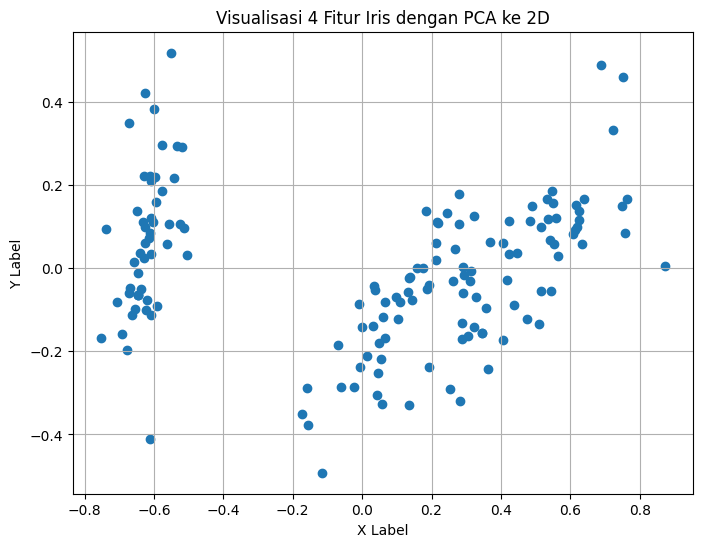

In [8]:
# data dari database diambil dan dimasukkan ke DataFrame
data = pd.DataFrame(data_remove_class, columns=["id", "SepalLengthCM", "SepalWidthCM", "PetalLengthCM", "PetalWidthCM"])

# Menghapus Kolom id
data = data.drop(columns=['id'])


scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# visualisasi 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_normalized)

# Plot hasil PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("Visualisasi 4 Fitur Iris dengan PCA ke 2D")
plt.xlabel("X Label")
plt.ylabel("Y Label")
plt.grid(True)
plt.show()

## Perhitungan K-Means

### Cluster 2

#### Clustering K-Means dengan Nilai K = 2

In [9]:
# mengambil data dalam database dan menghapus kolom id
values_x = data_normalized
k_means_C2 = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=10,
    max_iter=250,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# latih model
k_means_C2.fit(values_x)

# ambil data,  label, dan inertia
labelC2 = k_means_C2.labels_
centroidsC2 = k_means_C2.cluster_centers_
InertiaC2 = k_means_C2.inertia_

Initialization complete
Iteration 0, inertia 15.589550228134376.
Iteration 1, inertia 12.207670008784614.
Iteration 2, inertia 12.183031729295674.
Iteration 3, inertia 12.143688281579719.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 29.161399814602028.
Iteration 1, inertia 12.1584355024979.
Iteration 2, inertia 12.143688281579719.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 21.8809075102585.
Iteration 1, inertia 12.373069772523253.
Iteration 2, inertia 12.207670008784614.
Iteration 3, inertia 12.183031729295674.
Iteration 4, inertia 12.143688281579719.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 30.92606906407268.
Iteration 1, inertia 12.143688281579719.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 20.24095625148514.
Iteration 1, inertia 12.373069772523253.
Iteration 2, inertia 12.207670008784614.
Itera

#### Hasil Pengelompokkan atau Clustering Data dengan K = 2

In [10]:
for i, (row, label) in enumerate(zip(data_remove_class, labelC2)):
    print(f"ID: {row[0]}, fitur: {row[1:]}, Cluster: {label}")

ID: 1, fitur: (5.1, 3.5, 1.4, 0.2), Cluster: 1
ID: 2, fitur: (4.9, 3.0, 1.4, 0.2), Cluster: 1
ID: 3, fitur: (4.7, 3.2, 1.3, 0.2), Cluster: 1
ID: 4, fitur: (4.6, 3.1, 1.5, 0.2), Cluster: 1
ID: 5, fitur: (5.0, 3.6, 1.4, 0.2), Cluster: 1
ID: 6, fitur: (5.4, 3.9, 1.7, 0.4), Cluster: 1
ID: 7, fitur: (4.6, 3.4, 1.4, 0.3), Cluster: 1
ID: 8, fitur: (5.0, 3.4, 1.5, 0.2), Cluster: 1
ID: 9, fitur: (4.4, 2.9, 1.4, 0.2), Cluster: 1
ID: 10, fitur: (4.9, 3.1, 1.5, 0.1), Cluster: 1
ID: 11, fitur: (5.4, 3.7, 1.5, 0.2), Cluster: 1
ID: 12, fitur: (4.8, 3.4, 1.6, 0.2), Cluster: 1
ID: 13, fitur: (4.8, 3.0, 1.4, 0.1), Cluster: 1
ID: 14, fitur: (4.3, 3.0, 1.1, 0.1), Cluster: 1
ID: 15, fitur: (5.8, 4.0, 1.2, 0.2), Cluster: 1
ID: 16, fitur: (5.7, 4.4, 1.5, 0.4), Cluster: 1
ID: 17, fitur: (5.4, 3.9, 1.3, 0.4), Cluster: 1
ID: 18, fitur: (5.1, 3.5, 1.4, 0.3), Cluster: 1
ID: 19, fitur: (5.7, 3.8, 1.7, 0.3), Cluster: 1
ID: 20, fitur: (5.1, 3.8, 1.5, 0.3), Cluster: 1
ID: 21, fitur: (5.4, 3.4, 1.7, 0.2), Cluster: 1
I

#### Nilai Innertia dengan K = 2

In [11]:
print(f"nilai inertia clustering sebanyak 2 yakni sebesar = {InertiaC2}")

nilai inertia clustering sebanyak 2 yakni sebesar = 12.143688281579719


#### Nilai Silhouette Score dengan Nilai K = 2

In [12]:
from sklearn.metrics import silhouette_score

Silhouette_scoreC2 = silhouette_score(values_x, labelC2)
print(f"Silhouette Score Cluster 2: {Silhouette_scoreC2:.4f}")

Silhouette Score Cluster 2: 0.6295


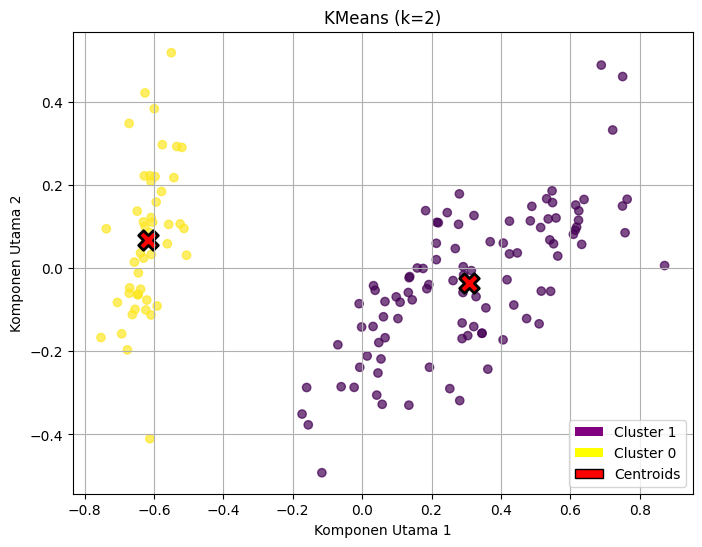

In [13]:
centroidsC2_pca = pca.transform(centroidsC2)

plt.figure(figsize=(8,6))

# a) titik data
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=labelC2, cmap='viridis', alpha=0.7)

# b) centroid
plt.scatter(centroidsC2_pca[:, 0], centroidsC2_pca[:, 1],
            c='red', marker='X', s=200, linewidths=2, edgecolors='k',
            label='Centroids')

# menambahkan legend untuk setiap cluster
legend_elements = [
    Patch(facecolor='purple', label='Cluster 1'),
    Patch(facecolor='yellow', label='Cluster 0'),
    Patch(facecolor='red', edgecolor='black', label='Centroids')
]

plt.title("KMeans (k=2)")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend(handles=legend_elements)
plt.grid(True)
plt.show()


### Cluster 3

#### Clustering K-Means dengan Nilai K = 3

In [14]:
# mengambil data dalam database dan menghapus kolom id

values_x = data_normalized
k_means_C3 = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=250,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# latih model
k_means_C3.fit(values_x)

# ambil data, label dan Inertia
labelC3 = k_means_C3.labels_
centroidsC3 = k_means_C3.cluster_centers_
InertiaC3 = k_means_C3.inertia_

Initialization complete
Iteration 0, inertia 10.782005700699735.
Iteration 1, inertia 7.159424311881558.
Iteration 2, inertia 7.138647703985377.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 14.358071849918954.
Iteration 1, inertia 7.499246861167659.
Iteration 2, inertia 7.286304084159063.
Iteration 3, inertia 7.217884802308979.
Iteration 4, inertia 7.193121890494894.
Iteration 5, inertia 7.182667132756725.
Iteration 6, inertia 7.169111467307468.
Iteration 7, inertia 7.151593675022098.
Iteration 8, inertia 7.138647703985377.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 12.482921230684385.
Iteration 1, inertia 7.445024568737754.
Iteration 2, inertia 7.151290363315535.
Iteration 3, inertia 7.03622560540593.
Iteration 4, inertia 7.003317600098681.
Iteration 5, inertia 6.9981140048267605.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 10.465126715219482.
It

#### Hasil Pengelompokkan atau Clustering K = 3

In [15]:
for i, (row, label) in enumerate(zip(data_remove_class, labelC3)):
    print(f"ID: {row[0]}, fitur: {row[1:]}, Cluster: {label}")

ID: 1, fitur: (5.1, 3.5, 1.4, 0.2), Cluster: 0
ID: 2, fitur: (4.9, 3.0, 1.4, 0.2), Cluster: 0
ID: 3, fitur: (4.7, 3.2, 1.3, 0.2), Cluster: 0
ID: 4, fitur: (4.6, 3.1, 1.5, 0.2), Cluster: 0
ID: 5, fitur: (5.0, 3.6, 1.4, 0.2), Cluster: 0
ID: 6, fitur: (5.4, 3.9, 1.7, 0.4), Cluster: 0
ID: 7, fitur: (4.6, 3.4, 1.4, 0.3), Cluster: 0
ID: 8, fitur: (5.0, 3.4, 1.5, 0.2), Cluster: 0
ID: 9, fitur: (4.4, 2.9, 1.4, 0.2), Cluster: 0
ID: 10, fitur: (4.9, 3.1, 1.5, 0.1), Cluster: 0
ID: 11, fitur: (5.4, 3.7, 1.5, 0.2), Cluster: 0
ID: 12, fitur: (4.8, 3.4, 1.6, 0.2), Cluster: 0
ID: 13, fitur: (4.8, 3.0, 1.4, 0.1), Cluster: 0
ID: 14, fitur: (4.3, 3.0, 1.1, 0.1), Cluster: 0
ID: 15, fitur: (5.8, 4.0, 1.2, 0.2), Cluster: 0
ID: 16, fitur: (5.7, 4.4, 1.5, 0.4), Cluster: 0
ID: 17, fitur: (5.4, 3.9, 1.3, 0.4), Cluster: 0
ID: 18, fitur: (5.1, 3.5, 1.4, 0.3), Cluster: 0
ID: 19, fitur: (5.7, 3.8, 1.7, 0.3), Cluster: 0
ID: 20, fitur: (5.1, 3.8, 1.5, 0.3), Cluster: 0
ID: 21, fitur: (5.4, 3.4, 1.7, 0.2), Cluster: 0
I

#### Nilai Inertia dengan K = 3

In [16]:
print(f"nilai inertia clustering sebanyak 3 yakni sebesar = {InertiaC3}")

nilai inertia clustering sebanyak 3 yakni sebesar = 6.9981140048267605


#### Nilai Silhouette dengan Nilai K = 3

In [17]:
from sklearn.metrics import silhouette_score

Silhouette_scoreC3 = silhouette_score(values_x, labelC3)
print(f"Silhouette Score Cluster 3: {Silhouette_scoreC3:.4f}")

Silhouette Score Cluster 3: 0.5043


#### Hitung Akurasi Clustering K = 3

In [18]:
C1 = 0
C2 = 0
C3 = 0

# hitung total benar cluster 1
for i in range(50):
  if labelC3[i] == 0:
    C1 += 1

# hitung total benar cluster 2
for j in range(50, 100):
  if labelC3[j] == 1:
    C2 += 1

# hitung total benar cluster 3
for k in range(100, 150):
  if labelC3[k] == 2:
    C3 += 1

# hitung akurasi
acc = ((C1 + C2 + C3) / len(labelC3)) * 100
print(f"hasil perhitungan akurasi = {acc}%")

hasil perhitungan akurasi = 88.66666666666667%


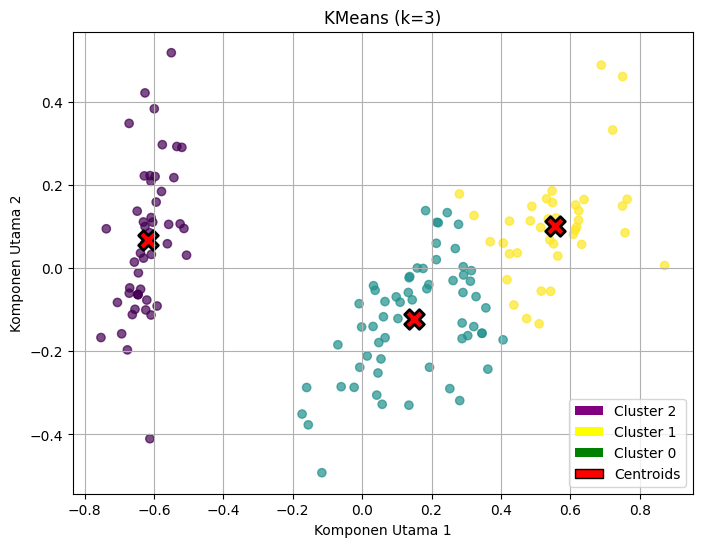

In [19]:
centroidsC3_pca = pca.transform(centroidsC3)

plt.figure(figsize=(8,6))

# a) titik data, diwarnai menurut label klaster
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=labelC3, cmap='viridis', alpha=0.7)

# b) centroid di ruang PCA
plt.scatter(centroidsC3_pca[:, 0], centroidsC3_pca[:, 1],
            c='red', marker='X', s=200, linewidths=2, edgecolors='k',
            label='Centroids')

# menambahkan legend untuk setiap cluster
legend_elements = [
    Patch(facecolor='purple', label='Cluster 2'),
    Patch(facecolor='yellow', label='Cluster 1'),
    Patch(facecolor='green', label='Cluster 0'),
    Patch(facecolor='red', edgecolor='black', label='Centroids')
]

plt.title("KMeans (k=3)")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend(handles=legend_elements)
plt.grid(True)
plt.show()

### Cluster 4

#### Clustering K-Means dengan Nilai K = 4

In [20]:
# mengambil data dalam database dan menghapus kolom id

values_x = data_normalized
k_means_C4 = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=250,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# latih model
k_means_C4.fit(values_x)

# ambil data, label dan Inertia
labelC4 = k_means_C4.labels_
centroidsC4 = k_means_C4.cluster_centers_
InertiaC4 = k_means_C4.inertia_

Initialization complete
Iteration 0, inertia 7.939472513485902.
Iteration 1, inertia 5.868733967674862.
Iteration 2, inertia 5.705393552507056.
Iteration 3, inertia 5.584555534745607.
Iteration 4, inertia 5.557380066599768.
Iteration 5, inertia 5.5416577630824975.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 9.581631247317889.
Iteration 1, inertia 6.793218916486281.
Iteration 2, inertia 6.600949166608553.
Iteration 3, inertia 6.468313252694651.
Iteration 4, inertia 6.226139994781539.
Iteration 5, inertia 6.035519152979061.
Iteration 6, inertia 5.9681010863600354.
Iteration 7, inertia 5.798528389969719.
Iteration 8, inertia 5.693133112023586.
Iteration 9, inertia 5.644752638278805.
Iteration 10, inertia 5.640491390897204.
Iteration 11, inertia 5.627429497318774.
Iteration 12, inertia 5.605400467193846.
Iteration 13, inertia 5.579480437573414.
Iteration 14, inertia 5.5602063018346675.
Iteration 15, inertia 5.549759171192485.
Converged at iter

#### Hasil Pengelompokkan atau Clustering dengan Nilai K = 4

In [21]:
for i, (row, label) in enumerate(zip(data_remove_class, labelC4)):
    print(f"ID: {row[0]}, fitur: {row[1:]}, Cluster: {label}")

ID: 1, fitur: (5.1, 3.5, 1.4, 0.2), Cluster: 0
ID: 2, fitur: (4.9, 3.0, 1.4, 0.2), Cluster: 0
ID: 3, fitur: (4.7, 3.2, 1.3, 0.2), Cluster: 0
ID: 4, fitur: (4.6, 3.1, 1.5, 0.2), Cluster: 0
ID: 5, fitur: (5.0, 3.6, 1.4, 0.2), Cluster: 0
ID: 6, fitur: (5.4, 3.9, 1.7, 0.4), Cluster: 0
ID: 7, fitur: (4.6, 3.4, 1.4, 0.3), Cluster: 0
ID: 8, fitur: (5.0, 3.4, 1.5, 0.2), Cluster: 0
ID: 9, fitur: (4.4, 2.9, 1.4, 0.2), Cluster: 0
ID: 10, fitur: (4.9, 3.1, 1.5, 0.1), Cluster: 0
ID: 11, fitur: (5.4, 3.7, 1.5, 0.2), Cluster: 0
ID: 12, fitur: (4.8, 3.4, 1.6, 0.2), Cluster: 0
ID: 13, fitur: (4.8, 3.0, 1.4, 0.1), Cluster: 0
ID: 14, fitur: (4.3, 3.0, 1.1, 0.1), Cluster: 0
ID: 15, fitur: (5.8, 4.0, 1.2, 0.2), Cluster: 0
ID: 16, fitur: (5.7, 4.4, 1.5, 0.4), Cluster: 0
ID: 17, fitur: (5.4, 3.9, 1.3, 0.4), Cluster: 0
ID: 18, fitur: (5.1, 3.5, 1.4, 0.3), Cluster: 0
ID: 19, fitur: (5.7, 3.8, 1.7, 0.3), Cluster: 0
ID: 20, fitur: (5.1, 3.8, 1.5, 0.3), Cluster: 0
ID: 21, fitur: (5.4, 3.4, 1.7, 0.2), Cluster: 0
I

#### Nilai Inertia dengan Nilai K = 4

In [22]:
print(f"nilai inertia clustering sebanyak 4 yakni sebesar = {InertiaC4}")

nilai inertia clustering sebanyak 4 yakni sebesar = 5.5328310030819


#### Nilai Silhouette dengan Nilai K = 4

In [23]:
from sklearn.metrics import silhouette_score

Silhouette_scoreC4 = silhouette_score(values_x, labelC4)
print(f"Silhouette Score Cluster 4: {Silhouette_scoreC4:.4f}")

Silhouette Score Cluster 4: 0.4446


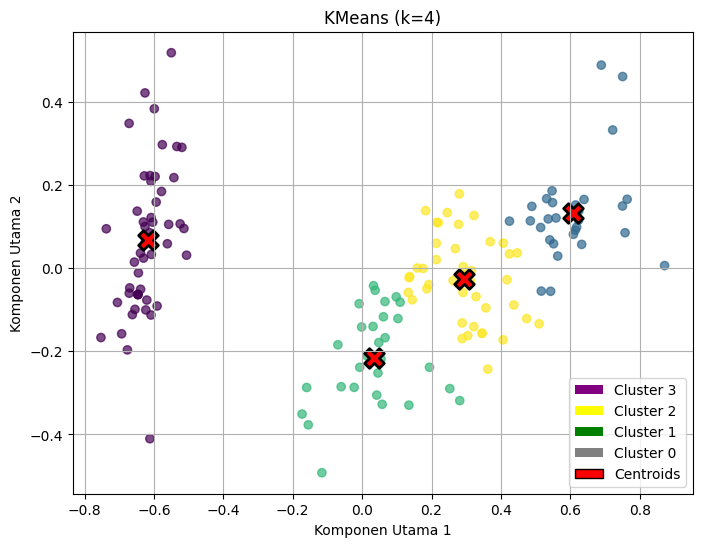

In [24]:
centroidsC4_pca = pca.transform(centroidsC4)

plt.figure(figsize=(8,6))

# a) titik data, diwarnai menurut label klaster
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=labelC4, cmap='viridis', alpha=0.7)

# b) centroid di ruang PCA
plt.scatter(centroidsC4_pca[:, 0], centroidsC4_pca[:, 1],
            c='red', marker='X', s=200, linewidths=2, edgecolors='k',
            label='Centroids')

# menambahkan legend untuk setiap cluster
legend_elements = [
    Patch(facecolor='purple', label='Cluster 3'),
    Patch(facecolor='yellow', label='Cluster 2'),
    Patch(facecolor='green', label='Cluster 1'),
    Patch(facecolor='gray', label='Cluster 0'),
    Patch(facecolor='red', edgecolor='black', label='Centroids')
]

plt.title("KMeans (k=4)")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend(handles=legend_elements)
plt.grid(True)
plt.show()

### Visualisasi Inertia Dari Ketiga Cluster Menggunakan Elbow Method

Visualisasi ini digunakan untuk menentukan cluster terbaik berdasarkan nilai innertia cluster dengan penurunan terbesar pertama

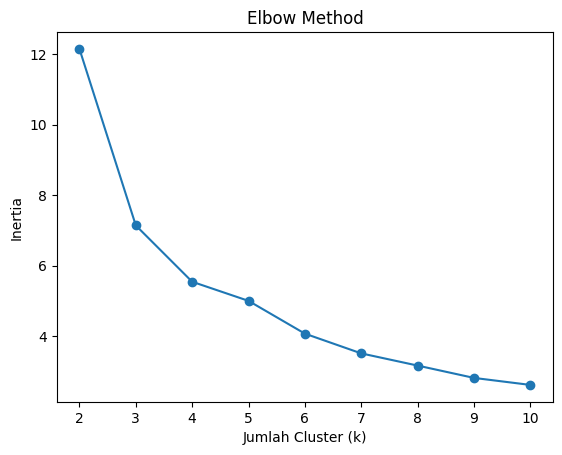

In [25]:
inertias = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(values_x)  # X = data kamu
    inertias.append(model.inertia_)

plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Bedasarkan visualisasi elbow di atas dapat disimpulkan bahwa kluster ke 3 merupakan kliuster terbaik sebab pada kluster tersebut memberikan penurunan terbesar pertama, setelah itu untuk nilai k selanjutnya pada grafik terlihat landai atau penurunannya tidak signifikan.

### Visualisasi Silhouette Score Berdasarkan Hasil Perhitungan Tiap Cluster

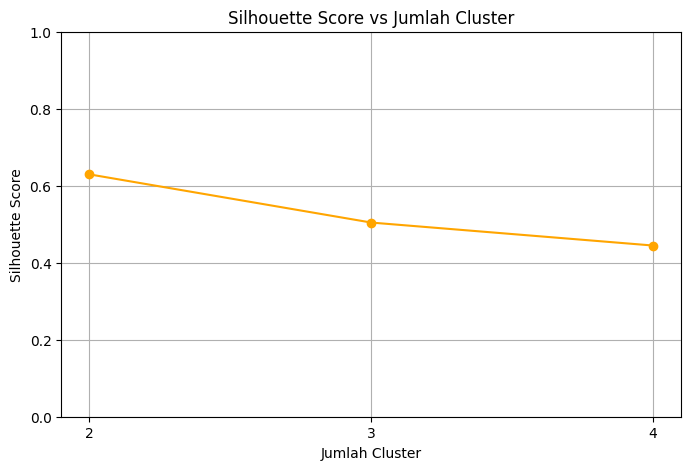

In [26]:
cluster_counts = [2, 3, 4]
silhouette_scores = []
silhouette_scores.append(Silhouette_scoreC2)
silhouette_scores.append(Silhouette_scoreC3)
silhouette_scores.append(Silhouette_scoreC4)

plt.figure(figsize=(8, 5))
plt.plot(cluster_counts, silhouette_scores, marker='o', linestyle='-', color='orange')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xticks(cluster_counts)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


Berdasarkan visualisasi di atas dapat disimpulkan bahwa cluster silhouette score terbaik terdapat pada cluster 3, sebab scorenya paling mendekati dengan 1.

# Fuzzy C-Means

Fuzzy C-Means atau biasa disebut FCM merupakan algoritma pengelompokkan yang memungkinkan pada setiap anggotanya menjadi bagian suatu kelompok dengan tingkat kecenderungan terhadap suatu kelompok atau derajat keanggotaan. Untuk metode clusteringnya membandingkan nilai derajat keanggotaannya pada setap fitur dan diambil nilai derajat keanggotaan paling tinggi pada setiap fitur, jika nilai derajat keanggotaan suatu data pada satu fitur lebih besar dari nilai derajat keanggotaannya pada fitur lain, maka akan langsung melakukan clustering pada fitur tersebut.

## Langkah-Langkah Clustering menggunakan FCM

1. **Inisialisasi Parameter:**

   - Jumlah cluster: $C$
   - Parameter fuzziness: $( m > 1 )$ (biasanya $( m = 2 ))$
   - Toleransi konvergensi: ( $\varepsilon$ )
   - Jumlah iterasi maksimum

2. **Inisialisasi Matriks Keanggotaan ( $U $):**

   Matriks keanggotaan $( U = [u_{ij}] $) diinisialisasi secara acak, dengan syarat:
   $$
   \sum_{j=1}^{C} u_{ij} = 1, \quad \forall i = 1, 2, \dots, n
   $$

  **Penjelasan:**

- $( u_{ij} $): derajat keanggotaan data ke-$( i $) terhadap cluster ke-$( j $)
- $( C $): jumlah total cluster
- $( n $): jumlah data

3. **Hitung Pusat Cluster $( v_j $):**

   Untuk setiap cluster $( j $), hitung centroid:

   $$
   v_j = \frac{ \sum_{i=1}^{n} (u_{ij})^m \cdot x_i }{ \sum_{i=1}^{n} (u_{ij})^m }
   $$

  **Penjelasan:**

- $( v_j $): pusat cluster ke-$( j $)  
- $( u_{ij} $): derajat keanggotaan data ke-$( i $) terhadap cluster ke-$( j $)  
- $( m $): parameter fuzziness (biasanya $( m > 1 $))  
- $( x_i $): data ke-$( i $)  
- $( n $): jumlah total data

4. **Update Matriks Keanggotaan $( U $):**

   Perbarui nilai keanggotaan untuk setiap data $( i $) dan cluster $( j $):

   $$
   u_{ij} = \frac{1}{\sum_{k=1}^{C} \left( \frac{ \|x_i - v_j\| }{ \|x_i - v_k\| } \right)^{\frac{2}{m-1}} }
   $$

   **Penjelasan:**

  - $( u_{ij} $): derajat keanggotaan data ke-$(i$) pada cluster ke-$(j$)
  - $( x_i $): titik data ke-$(i$)
  - $( v_j $): centroid cluster ke-$(j$)
  - $( C $): jumlah cluster
  - $( m > 1 $): parameter fuzziness (biasanya bernilai 2)
  - $( $|$cdot$|): jarak antara titik data dan centroid (biasanya menggunakan Euclidean distance)

5. **Cek Konvergensi:**

   Hitung perubahan nilai keanggotaan menggunakan fungsi objectif:

   $$
  J_m = \sum_{i=1}^{n} \sum_{j=1}^{C} (u_{ij})^m \cdot \| x_i - v_j \|^2
  $$

  **Penjelasan:**

- $( u_{ij} $): derajat keanggotaan data ke-$( i $) terhadap cluster ke-$( j $)
- $( C $): jumlah total cluster
- $( n $): jumlah data

  Artinya, setiap data $( x_i $) memiliki sejumlah derajat keanggotaan terhadap semua cluster, dan **jumlah total nilai keanggotaan tersebut harus sama dengan 1**.

  Jika terpenuhi atau iterasi maksimum tercapai, proses berhenti.


6. **Penentuan Hasil:**

   Setiap data $( x_i $) diklasifikasikan ke cluster dengan nilai keanggotaan $( u_{ij} $) terbesar.


In [27]:
!pip install openpyxl

In [28]:
from pprint import pprint

# Data manual
data = [
    [1, 2],
    [2, 3],
    [3, 4],
    [6, 7],
    [7, 8]
]

# Derajat keanggotaan awal
miu = [
    [0.5, 0.5],
    [0.7, 0.3],
    [0.8, 0.2],
    [0.7, 0.3],
    [0.6, 0.4]
]

# Parameter
m = 2
epsilon = 1e-4
max_iter = 100
n_samples = len(data)
n_clusters = len(miu[0])
n_features = len(data[0])

# Manual fungsi hitung centroid
def calculate_centroids(data, miu, m):
    centroids = []
    for j in range(n_clusters):
        numerator = [0.0] * n_features
        denominator = 0.0
        for i in range(n_samples):
            weight = miu[i][j] ** m
            for f in range(n_features):
                numerator[f] += weight * data[i][f]
            denominator += weight
        centroid = [num / denominator for num in numerator]
        centroids.append(centroid)
    return centroids

# Hitung manual Euclidean distance
def euclidean_distance(x, y):
    return sum([(x[i] - y[i]) ** 2 for i in range(len(x))]) ** 0.5

# Update miu manual
def update_miu(data, centroids, m):
    new_miu = []
    for i in range(n_samples):
        row = []
        for j in range(n_clusters):
            d_ij = euclidean_distance(data[i], centroids[j]) + 1e-10  # avoid /0
            total = 0.0
            for k in range(n_clusters):
                d_ik = euclidean_distance(data[i], centroids[k]) + 1e-10
                total += (d_ij / d_ik) ** (2 / (m - 1))
            mu = 1 / total
            row.append(mu)
        new_miu.append(row)
    return new_miu

# Iterasi FCM manual
for iteration in range(max_iter):
    centroids = calculate_centroids(data, miu, m)
    new_miu = update_miu(data, centroids, m)

    print(f"\nIterasi {iteration + 1}")
    print("Pusat Centroids:")
    pprint(centroids)
    print("\n")
    print("Updated Membership Degrees:")
    pprint(new_miu)

    # Hitung selisih total perubahan miu
    max_change = 0.0
    for i in range(n_samples):
        for j in range(n_clusters):
            change = abs(new_miu[i][j] - miu[i][j])
            max_change = max(max_change, change)

    print("Fungsi J = ", max_change)

    if max_change < epsilon:
        print("\nKonvergen pada iterasi = ", iteration + 1)
        break

    miu = new_miu
else:
    print("\nMaksimal iterasi tercapai tanpa konvergensi")

# fuzzy objectif untuk konvergensi


Iterasi 1
Pusat Centroids:
[[3.8609865470852016, 4.860986547085202],
 [3.507936507936508, 4.507936507936509]]


Updated Membership Degrees:
[[0.4345250479074028, 0.5654749520925972],
 [0.3963422800238885, 0.6036577199761114],
 [0.2581809120060003, 0.7418190879939998],
 [0.5757944756897294, 0.42420552431027064],
 [0.5530912378562453, 0.4469087621437547]]
Fungsi J =  0.5418190879939997

Iterasi 2
Pusat Centroids:
[[4.603368541578456, 5.6033685415784555],
 [3.2074384494266592, 4.207438449426659]]


Updated Membership Degrees:
[[0.2728773612804249, 0.7271226387195752],
 [0.1770286018039973, 0.8229713981960027],
 [0.016462758504963267, 0.9835372414950367],
 [0.7999196283203301, 0.20008037167966988],
 [0.7146252271157961, 0.2853747728842038]]
Fungsi J =  0.24171815350103704

Iterasi 3
Pusat Centroids:
[[6.009715943087444, 7.009715943087444],
 [2.4383641760683887, 3.438364176068389]]


Updated Membership Degrees:
[[0.07615697691882663, 0.9238430230811734],
 [0.011810899013819024, 0.988189100

## Implementasi pada Data Iris

### Koneksi ke Database MySQL menggunakan aiven.io

In [29]:
import pymysql

# koneksi ke database mysql melalui aiven.io
DB_HOST = "mysql-131f3e28-fathanlearn-5ad0.i.aivencloud.com"
DB_PORT = 25962
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_hCKUXEhLqojSjCxujVo"

connect_2 = pymysql.connect(
    host=DB_HOST,
    port=DB_PORT,
    database=DB_NAME,
    user=DB_USER,
    password=DB_PASS,
    ssl={'ssl': {}}
)

data_mysql = connect_2.cursor()

# ambil data ke database
data_mysql.execute("SELECT * FROM iris_mysql.data_Iris LIMIT 10;")
data_db_sql = data_mysql.fetchall()


print("10 data dalam tabel data_iris")
for data2 in data_db_sql:
  print(data2)

10 data dalam tabel data_iris
(1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa')
(2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa')
(3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa')
(4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa')
(5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa')
(6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa')
(7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa')
(8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa')
(9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa')
(10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa')


### Menghapus Kolom Id dan Species

In [30]:
# data dari database diambil dan dimasukkan ke DataFrame
data_mysql.execute("SELECT * FROM iris_mysql.data_Iris;")
save_data_iris = data_mysql.fetchall()
data_final = pd.DataFrame(save_data_iris, columns=["id", "SepalLengthCM", "SepalWidthCM", "PetalLengthCM", "PetalWidthCM", "Species"])

# Menghapus Kolom id
data_final = data_final.drop(columns=['id', "Species"])
print(tabulate(data_final, headers="keys", tablefmt='pretty'))

+-----+---------------+--------------+---------------+--------------+
|     | SepalLengthCM | SepalWidthCM | PetalLengthCM | PetalWidthCM |
+-----+---------------+--------------+---------------+--------------+
|  0  |      5.1      |     3.5      |      1.4      |     0.2      |
|  1  |      4.9      |     3.0      |      1.4      |     0.2      |
|  2  |      4.7      |     3.2      |      1.3      |     0.2      |
|  3  |      4.6      |     3.1      |      1.5      |     0.2      |
|  4  |      5.0      |     3.6      |      1.4      |     0.2      |
|  5  |      5.4      |     3.9      |      1.7      |     0.4      |
|  6  |      4.6      |     3.4      |      1.4      |     0.3      |
|  7  |      5.0      |     3.4      |      1.5      |     0.2      |
|  8  |      4.4      |     2.9      |      1.4      |     0.2      |
|  9  |      4.9      |     3.1      |      1.5      |     0.1      |
| 10  |      5.4      |     3.7      |      1.5      |     0.2      |
| 11  |      4.8    

### Normalisasi Data Iris Menggunakan Min Max Scaler

Dalam data science dan machine learning, normalisasi Min-Max (Min-Max Scaling) adalah teknik untuk mengubah nilai fitur ke dalam skala tertentu, biasanya antara 0 dan 1.

Rumus normalisasi Min-Max adalah:  

$X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$

**Keterangan:**
- $( X $) : Nilai asli (nilai mentah pada data)
- $( X_{\text{min}} $) : Nilai minimum dari fitur/kolom
- $( X_{\text{max}} $) : Nilai maksimum dari fitur/kolom
- $( X_{\text{norm}} $) : Nilai setelah dinormalisasi (biasanya dalam rentang [0, 1])


In [31]:
# gunakan min max scaler
scaler_iris = MinMaxScaler()
# training data Normalisasi
data_normalisasi = scaler_iris.fit_transform(data_final)
header = ["SepalLengthCM", "SepalWidthCM", "PetalLengthCM", "PetalWidthCM"]
print(tabulate(data_normalisasi, headers=header, tablefmt='pretty'))

+---------------------+---------------------+----------------------+---------------------+
|    SepalLengthCM    |    SepalWidthCM     |    PetalLengthCM     |    PetalWidthCM     |
+---------------------+---------------------+----------------------+---------------------+
| 0.2222222222222221  |        0.625        | 0.06779661016949151  | 0.04166666666666667 |
| 0.16666666666666674 | 0.41666666666666674 | 0.06779661016949151  | 0.04166666666666667 |
| 0.11111111111111116 |         0.5         | 0.05084745762711865  | 0.04166666666666667 |
| 0.08333333333333326 | 0.45833333333333326 |  0.0847457627118644  | 0.04166666666666667 |
| 0.19444444444444442 | 0.6666666666666667  | 0.06779661016949151  | 0.04166666666666667 |
| 0.3055555555555556  | 0.7916666666666665  | 0.11864406779661013  |        0.125        |
| 0.08333333333333326 | 0.5833333333333333  | 0.06779661016949151  | 0.08333333333333333 |
| 0.19444444444444442 | 0.5833333333333333  |  0.0847457627118644  | 0.04166666666666667 |

### Code Perhitungan untuk Fuzzy C-Means

In [32]:
import numpy as np

def initialize_membership(n_samples, c):
    # Inisialisasi matriks keanggotaan dengan nilai acak dan normalisasi per data
    U = np.random.rand(n_samples, c)
    U = U / np.sum(U, axis=1, keepdims=True)
    return U

def compute_centroids(X, U, m):
    um = U ** m  # pangkat fuzziness
    centroids = (um.T @ X) / np.sum(um.T, axis=1, keepdims=True)
    return centroids

def update_membership(X, centroids, m):
    n = X.shape[0]
    c = centroids.shape[0]
    dist = np.zeros((n, c))
    for j in range(c):
        dist[:, j] = np.linalg.norm(X - centroids[j], axis=1)
    dist = np.fmax(dist, 1e-10)  # cegah pembagian dengan nol

    exponent = 2 / (m - 1)
    denom = (dist[:, :, None] / dist[:, None, :]) ** exponent
    U_new = 1 / np.sum(denom, axis=2)
    return U_new

def compute_objective(X, centroids, U, m):
    dist_squared = np.zeros_like(U)
    for j in range(centroids.shape[0]):
        dist_squared[:, j] = np.linalg.norm(X - centroids[j], axis=1) ** 2
    J = np.sum((U ** m) * dist_squared)
    return J

def fuzzy_c_means(X, c, m=2.0, max_iter=100, tol=1e-5, verbose=True):
    n_samples = X.shape[0]

    # Inisialisasi keanggotaan
    U = initialize_membership(n_samples, c)

    for iteration in range(max_iter):
        centroids = compute_centroids(X, U, m)
        U_new = update_membership(X, centroids, m)

        J_old = compute_objective(X, centroids, U, m)
        J_new = compute_objective(X, centroids, U_new, m)

        diff = abs(J_new - J_old)
        if verbose:
            print(f"Iterasi {iteration+1}: fungsi objektif = {J_new:.6f}, perubahan = {diff:.6f}")

        if diff < tol:
            if verbose:
                print("Konvergen! Iterasi dihentikan.")
            break

        U = U_new

    return centroids, U

c = 3
m = 2
max_iter = 300
tol = 1e-6

centroids, U = fuzzy_c_means(data_normalized, c, m, max_iter, tol)

# Tampilkan derajat keanggotaan 10 data pertama
from tabulate import tabulate
header = [f"Cluster {i+1}" for i in range(c)]
print("\n10 Membership Degree Setiap Data: ")
print(tabulate(U[:10], headers=header, tablefmt='pretty'))


Iterasi 1: fungsi objektif = 13.711612, perubahan = 4.426423
Iterasi 2: fungsi objektif = 13.594414, perubahan = 0.077701
Iterasi 3: fungsi objektif = 12.852155, perubahan = 0.533968
Iterasi 4: fungsi objektif = 9.686605, perubahan = 2.040163
Iterasi 5: fungsi objektif = 6.176608, perubahan = 1.479918
Iterasi 6: fungsi objektif = 5.447892, perubahan = 0.207284
Iterasi 7: fungsi objektif = 5.297739, perubahan = 0.049732
Iterasi 8: fungsi objektif = 5.255859, perubahan = 0.014832
Iterasi 9: fungsi objektif = 5.241789, perubahan = 0.005279
Iterasi 10: fungsi objektif = 5.236476, perubahan = 0.002038
Iterasi 11: fungsi objektif = 5.234394, perubahan = 0.000803
Iterasi 12: fungsi objektif = 5.233573, perubahan = 0.000316
Iterasi 13: fungsi objektif = 5.233251, perubahan = 0.000124
Iterasi 14: fungsi objektif = 5.233124, perubahan = 0.000049
Iterasi 15: fungsi objektif = 5.233074, perubahan = 0.000019
Iterasi 16: fungsi objektif = 5.233055, perubahan = 0.000007
Iterasi 17: fungsi objektif = 

### Clustering Data Setelah Proses Perhitungan

In [33]:
# mendapatkan nilai maximal dalam setiap baris data
labels = np.argmax(U, axis=1)

# menambahkan ke data ke dataframe
df_result = pd.DataFrame(data_normalized, columns=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"])
df_result["Cluster"] = labels

print(tabulate(df_result, headers="keys", tablefmt='pretty'))

+-----+---------------------+---------------------+----------------------+---------------------+---------+
|     |     SepalLength     |     SepalWidth      |     PetalLength      |     PetalWidth      | Cluster |
+-----+---------------------+---------------------+----------------------+---------------------+---------+
|  0  | 0.2222222222222221  |        0.625        | 0.06779661016949151  | 0.04166666666666667 |   0.0   |
|  1  | 0.16666666666666674 | 0.41666666666666674 | 0.06779661016949151  | 0.04166666666666667 |   0.0   |
|  2  | 0.11111111111111116 |         0.5         | 0.05084745762711865  | 0.04166666666666667 |   0.0   |
|  3  | 0.08333333333333326 | 0.45833333333333326 |  0.0847457627118644  | 0.04166666666666667 |   0.0   |
|  4  | 0.19444444444444442 | 0.6666666666666667  | 0.06779661016949151  | 0.04166666666666667 |   0.0   |
|  5  | 0.3055555555555556  | 0.7916666666666665  | 0.11864406779661013  |        0.125        |   0.0   |
|  6  | 0.08333333333333326 | 0.58333

### Hitung Nilai Akurasi Pengelompokkan Setelah Proses Perhitungan

In [34]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

predicted_labels = np.argmax(U, axis=1)
true_labels = np.array([0]*50 + [1]*50 + [2]*50)

# fungsi untuk mapping cluster
def best_cluster_mapping(true_labels, predicted_labels):
    label_map = np.zeros_like(np.unique(predicted_labels))
    for cluster in np.unique(predicted_labels):
        mask = predicted_labels == cluster
        most_common = mode(true_labels[mask], keepdims=False).mode
        label_map[cluster] = most_common
    return label_map

# proses menyimpan data
label_map = best_cluster_mapping(true_labels, predicted_labels)
mapped_preds = np.array([label_map[label] for label in predicted_labels])

# Hitung akurasi
accuracy = accuracy_score(true_labels, mapped_preds)
print(f"Akurasi FCM setelah pemetaan label: {accuracy * 100:.2f}%")


Akurasi FCM setelah pemetaan label: 89.33%


### Hitung Nilai Silhouette Score FCM

In [35]:
from sklearn.metrics import silhouette_score

Silhouette_scoreFCM = silhouette_score(data_normalisasi, labels)
print(f"Silhouette Score Cluster 3: {Silhouette_scoreFCM:.4f}")

Silhouette Score Cluster 3: 0.4955


### Perbandingan Silhouette Score dan Nilai Akurasi dari Metode FCM dan K-Means

Berdasarkan hasil Training untuk 3 Cluster pada data IRIS menggunakan dua metode yakni K-Means dan FCM dapat dibandingkan untuk nilai akurasi dan silhouettenya. Untuk nilai akurasi metode K-Means yakni sebesar 88% dengan nilai Silhouette Scorenya sebesar 0.5043, sedangkan jika menggunakan metode FCM untuk nilai akurasi nya yakni 89% dengan nilai Silhouette sebesar 0.4955. Dapat disimpulakan bahwa untuk akurasi menggunakan metode FCM lebih baik dibandingkan dengan menggunakan metode K-Means, sedangkan untuk Silhouette Score lebih baik menggunakan K-Means jadi kemiripan data antar cluster itu dapat didefinisikan dengan baik.

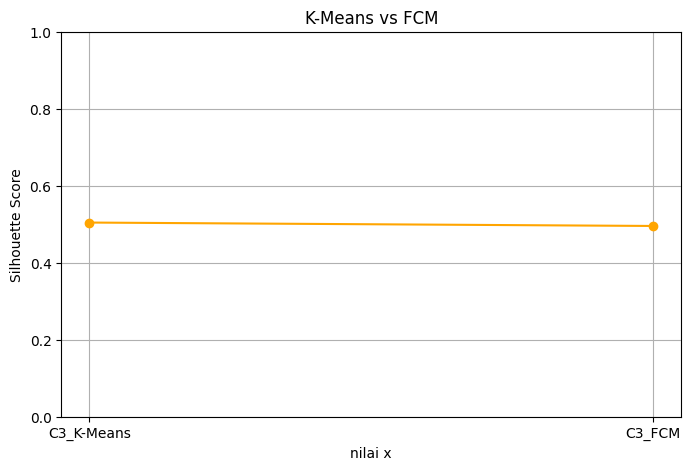

In [36]:
cluster_counts = ["C3_K-Means", "C3_FCM"]
silhouette_scores = []
silhouette_scores.append(Silhouette_scoreC3)
silhouette_scores.append(Silhouette_scoreFCM)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(cluster_counts, silhouette_scores, marker='o', linestyle='-', color='orange')
plt.xlabel('nilai x')
plt.ylabel('Silhouette Score')
plt.title('K-Means vs FCM')
plt.xticks(cluster_counts)
plt.ylim(0, 1)
plt.grid(True)
plt.show()